<a href="https://colab.research.google.com/github/uveysturhan/condensed-matter-related/blob/main/Hofstadter_Butterfly_Visualisation_Harper_Equation_vs_Tight_Binding_Hamiltonian_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

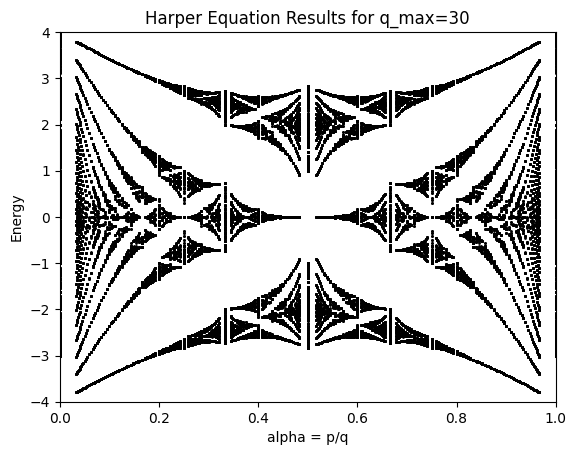

In [ ]:
#Harper Equation Approach
import numpy as np
import matplotlib.pyplot as plt
#Using the Harper equation, we find the Harper matrix (the Hamiltonian) using the following function.
def find_harper_matrix(q, alpha, kx, t=1.0):
    H = np.zeros((q, q), dtype=np.complex128)
    for n in range(q):
        H[n, n] = -2.0* t * np.cos(- kx + 2.0*np.pi*alpha*n) #Diagonal elements in the Harper matrix
        n_plus = (n + 1) % q #Periodic boundary conditions
        H[n, n_plus] += -t #Non-diagonal elements
        H[n_plus, n] += -t #the Hamiltonian is hermitean

    return H

#Then, after calculating eigenvalues (energies) of the Hamiltonian, we plot the energies against different rational flux ratio.

def plot_butterfly(q_max=15, kx_samples=200, ky_samples=200, t=1.0): #We loop over different kx values in the Brillouin zone to get the full spectrum
    alphas = []
    energies = []
    for q in range(1, q_max+1):
        for p in range(q+1):
            alpha = p / q
            for i in range(1 , kx_samples):
              Hq = find_harper_matrix(q, alpha, 2.0* np.pi * i / (kx_samples), t=1.0) #Hamiltonian size: (q, q)
              #We find the Hamiltonian for different values of parameters and store the energies and flux ratios in the respective lists.
              eigvals = np.linalg.eigvalsh(Hq)
              alphas.extend([alpha]*len(eigvals))
              energies.extend(eigvals)

    plt.scatter(alphas, energies, s=1, color='black') #We scatter plot the energies against the flux ratio
    plt.xlabel('alpha = p/q')
    plt.ylabel('Energy')
    plt.title(f'Harper Equation Results for q_max={q_max}')
    plt.xlim(0, 1)
    plt.ylim(-4, 4)
    plt.show()


plot_butterfly(q_max=30, kx_samples=6)


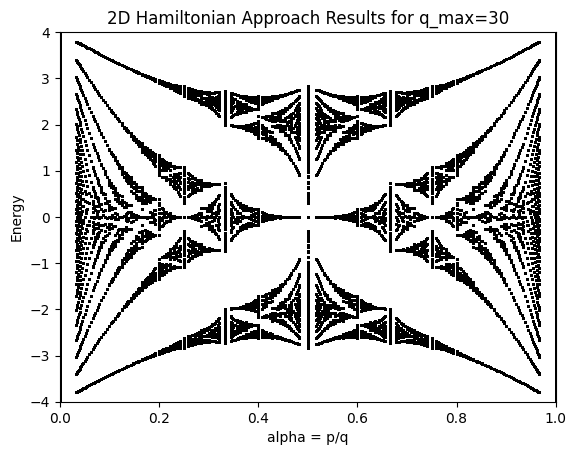

In [ ]:
#Directly Diagonalizing the Hamiltonian Approach
import numpy as np
import matplotlib.pyplot as plt

def find_hamiltonian(q, p, t=1.0):
    Nx, Ny = q, q
    alpha = p / q
    H = np.zeros((Nx*Ny, Nx*Ny), dtype=np.complex128)

    for n in range(Ny):
        for m in range(Nx):
            #For +x hopping

            m_plus = (m + 1 ) % Nx #Due to periodic boundary conditions
            i = n * Nx + m #We label the site (m,n) --> n * Nx + m
            j = n * Nx + m_plus #j = i+1, the neighbouring site of i.

            hopping_phase_x = np.exp(1j * 2.0 * np.pi * alpha * n)

            H[i, j] = -t * hopping_phase_x
            H[j, i] = -t * np.conjugate(hopping_phase_x)

            #For +y hopping

            n_plus = (n + 1) % Ny
            k = n_plus * Nx + m

            H[i, k] = -t
            H[k, i] = -t

    return H

def plot_butterfly_2d(q_max=6, t=1.0):
    alphas_2d = []
    energies_2d = []

    for q in range(1, q_max+1):
        for p in range(q+1):
            alpha = p / q
            H_2D = find_hamiltonian(q, p, t=t) #Hamiltonian size: "(q^2,q^2)"
            eigvals = np.linalg.eigvalsh(H_2D)
            alphas_2d.extend([alpha]*len(eigvals))
            energies_2d.extend(eigvals)
    plt.scatter(alphas_2d, energies_2d, s=1, color='black')
    plt.xlabel('alpha = p/q')
    plt.ylabel('Energy')
    plt.title(f'2D Hamiltonian Approach Results for q_max={q_max}')
    plt.xlim(0, 1)
    plt.ylim(-4, 4)
    plt.show()

plot_butterfly_2d(q_max=30)


In [ ]:
#Finding Elements of Hamiltonian
import sympy as sp
from IPython.display import display, Math
def show_hamiltonian(q, p, t=1.0):
  h = find_hamiltonian(q, p, t=1.0)
  sym_matrix = sp.Matrix(h)
  latex_str = sp.latex(sym_matrix)
  return latex_str

display(Math(show_hamiltonian(2,17,t=1.0)))

<IPython.core.display.Math object>